In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import math
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

In [5]:
df = pd.read_csv(r'/Users/arshita/Documents/Machine learning/Case Study 8 run or walk/run_or_walk.csv')
df

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [7]:
df = df.drop('date', axis = 1)
df

,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...
88583,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [9]:
df = df.drop('time', axis = 1)
df

,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...
88583,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [11]:
df = df.drop('username', axis = 1)
df

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [15]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [17]:
df.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


<Axes: >

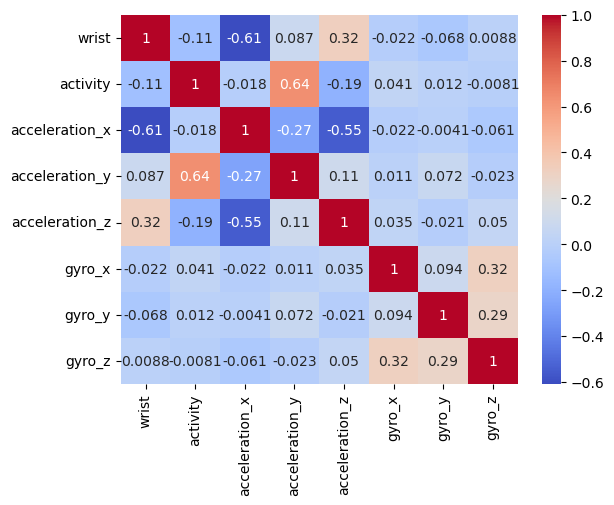

In [19]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

## Model 1

In [45]:
X = df.drop('activity', axis = 1)
Y = df['activity']

In [26]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [28]:
model1 = GaussianNB()
model1.fit(train_x, train_y)

GaussianNB()

In [30]:
y_pred = model1.predict(test_x)

In [32]:
accuracy = accuracy_score(test_y, y_pred)
accuracy

0.9560898521277796

In [34]:
cr = classification_report(test_y, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13169
           1       0.99      0.92      0.95     13408

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



## Model 2

In [64]:
X2 = df.iloc[:,2:5]
print(X2)

Y2 = df['activity']

       acceleration_x  acceleration_y  acceleration_z
0              0.2650         -0.7814         -0.0076
1              0.6722         -1.1233         -0.2344
2              0.4399         -1.4817          0.0722
3              0.3031         -0.8125          0.0888
4              0.4814         -0.9312          0.0359
...               ...             ...             ...
88583          0.3084         -0.8376         -0.1327
88584          0.4977         -1.0027         -0.4397
88585          0.4587         -1.1780         -0.2827
88586          0.2590         -0.8582         -0.0759
88587          0.3140         -0.8008         -0.0911

[88588 rows x 3 columns]


In [47]:
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size = 0.30, random_state = 1)

In [49]:
model2 = GaussianNB()
model2.fit(train_x2, train_y2)

GaussianNB()

In [53]:
y_pred2 = model2.predict(test_x2)

In [55]:
accuracy2 = accuracy_score(test_y2, y_pred2)
accuracy2

0.9562779847236332

In [57]:
cr2 = classification_report(test_y2, y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     13169
           1       0.99      0.92      0.96     13408

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



## Model 3

In [62]:
X3 = df.iloc[:,5:]
print(X3)

Y3 = df['activity']

       gyro_x  gyro_y  gyro_z
0     -0.0590  0.0325 -2.9296
1     -0.1757  0.0208  0.1269
2     -0.9105  0.1063 -2.4367
3      0.1199 -0.4099 -2.9336
4      0.0527  0.4379  2.4922
...       ...     ...     ...
88583  0.4823  2.0124  0.6048
88584  0.1022 -1.2565 -0.0761
88585 -1.4500 -0.2792 -1.2616
88586 -1.5165  0.4560 -1.7755
88587  0.1183  1.0850  1.2814

[88588 rows x 3 columns]


In [66]:
train_x3, test_x3, train_y3, test_y3 = train_test_split(X3, Y3, test_size = 0.30, random_state = 1)

In [68]:
model3 = GaussianNB()
model3.fit(train_x3, train_y3)

GaussianNB()

In [72]:
y_pred3 = model3.predict(test_x3)

In [74]:
accuracy3 = accuracy_score(test_y3, y_pred3)
accuracy3

0.6505248899424314

In [76]:
cr3 = classification_report(test_y3, y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     13169
           1       0.69      0.55      0.61     13408

    accuracy                           0.65     26577
   macro avg       0.66      0.65      0.65     26577
weighted avg       0.66      0.65      0.65     26577

